In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

C:\Users\Bright\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
ticker = 'PG'
data = pd.DataFrame()

data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-12-31')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
r = 0.025

In [5]:
stdev = log_returns.std() * 250

stdev

PG    2.722888
dtype: float64

In [6]:
stdev =stdev.values

In [7]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

In [8]:
iterations = 10000

In [9]:
Z = np.random.standard_normal((t_intervals + 1,iterations))

In [10]:
S = np.zeros_like(Z)

In [11]:
S0 = data.iloc[-1]

In [12]:
S[0] = S0 

In [13]:
for t in range(1, t_intervals +1):
    S[t] = S[t-1]*np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [14]:
S

array([[8.52456207e+01, 8.52456207e+01, 8.52456207e+01, ...,
        8.52456207e+01, 8.52456207e+01, 8.52456207e+01],
       [6.91726740e+01, 8.31730235e+01, 9.78885647e+01, ...,
        8.46898813e+01, 7.95745317e+01, 9.49693942e+01],
       [7.52686604e+01, 6.66194454e+01, 8.66061345e+01, ...,
        9.11453396e+01, 6.51075506e+01, 1.00030712e+02],
       ...,
       [5.53644087e-01, 1.80836165e+01, 6.68377959e-02, ...,
        8.51567335e-02, 1.26149001e-02, 9.22248940e-01],
       [5.89469343e-01, 1.60364963e+01, 5.61832671e-02, ...,
        8.63643755e-02, 1.39421638e-02, 9.77558064e-01],
       [7.00412512e-01, 1.76248227e+01, 5.61234615e-02, ...,
        7.23479100e-02, 1.41665318e-02, 1.07900232e+00]])

In [15]:
S.shape

(251, 10000)

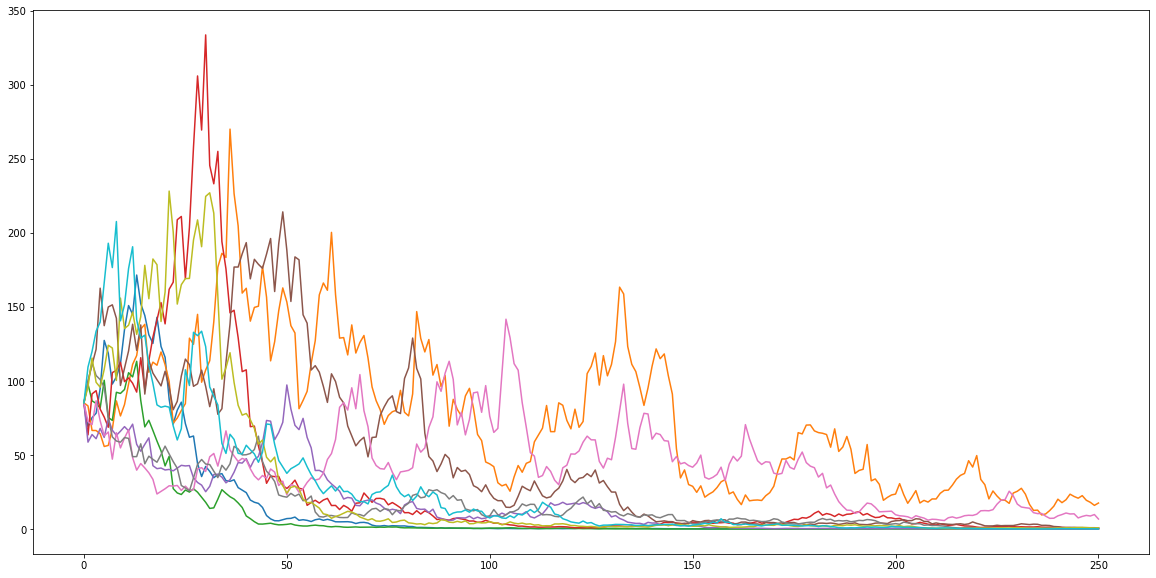

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(S[:,:10]);

##### Calculation of the Call Option Price

In [24]:
p = np.maximum(S[-1] - 110,0)

In [25]:
p.shape

(10000,)

In [26]:
C = np.exp(-r * T) * np.sum(p) / iterations

C

75.97188730218295

In [27]:
p

array([0., 0., 0., ..., 0., 0., 0.])